In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import seaborn as sns

In [2]:
##### 01 #####

df = pd.read_csv('C:/Users/dsadm/Desktop/somativaIABDjessy/SomativaIABDjessy/dadosacoes.csv', sep = ',')

In [3]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


Text(0.5, 1.0, 'Box plot Nome Ação x Valor de mercado R$ -(Bilhões)')

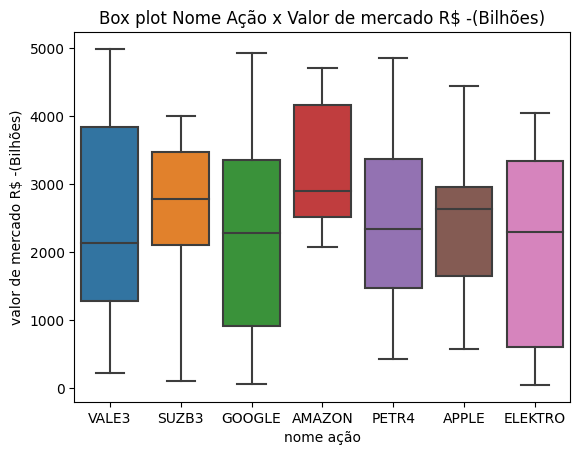

In [4]:
##### 02 #####

sns.boxplot(x=df['nome ação'],y=df['valor de mercado R$ -(Bilhões)']) 
plt.title("Box plot Nome Ação x Valor de mercado R$ -(Bilhões)")

Text(0.5, 1.0, 'Box plot Nome Ação x Valor de Mercado')

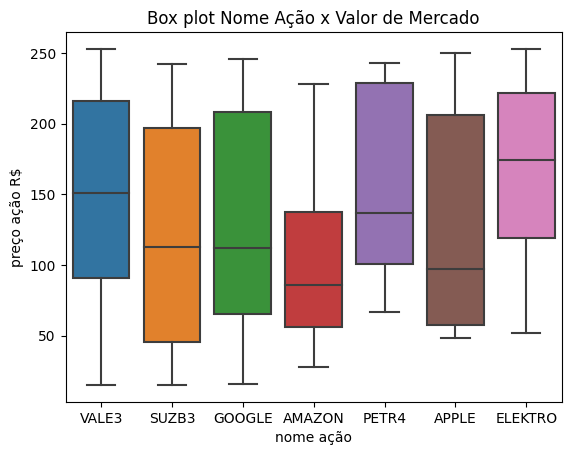

In [5]:
sns.boxplot(x=df['nome ação'],y=df['preço ação R$']) 
plt.title('Box plot Nome Ação x Valor de Mercado')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [7]:
df.describe

<bound method NDFrame.describe of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [8]:
##### 03 ######

dados_ativos = pd.get_dummies(df,columns=['nome ação'], drop_first=True)

In [9]:
dados_ativos.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [10]:
dic = {1:'True',0:'False'}
dados_ativos.rename(columns=dic,inplace=True)

In [11]:
dados_ativos.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [12]:
##### 04.A #####

kmeans = KMeans(n_clusters=5) 
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [13]:
sse = kmeans.inertia_
print(sse)

8688440.119978353


In [14]:
##### 04.B #####

kmeans = KMeans(n_clusters=6) 
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [15]:
sse = kmeans.inertia_
print(sse)

5428800.239280457


In [16]:
##### 05 #####

labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 

In [17]:
plt.scatter(df['Símbolo'],df['Preço'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Símbolo")
plt.ylabel("Preço")

KeyError: 'Símbolo'

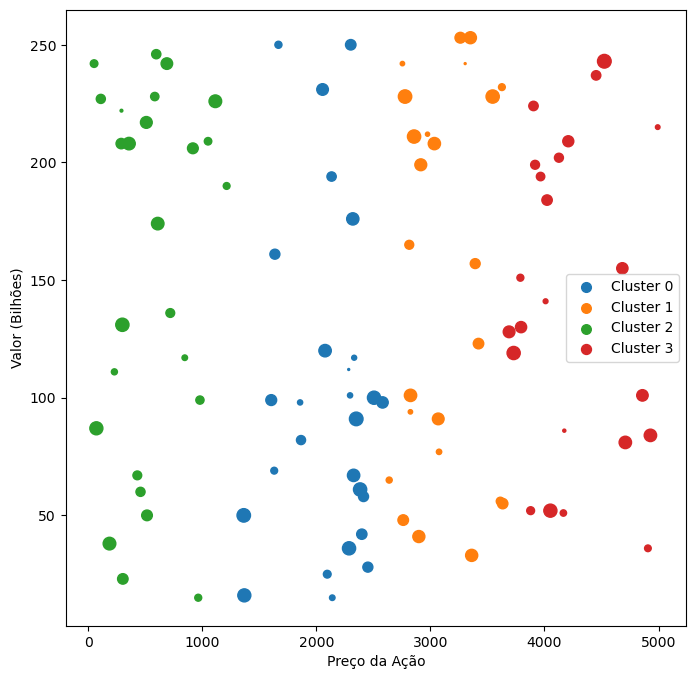

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           101.740741   54.777778                     2101.259259   
1           150.583333   52.000000                     3114.291667   
2           153.038462   50.307692                      553.961538   
3           142.347826   50.695652                     4238.695652   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.185185           0.074074          0.185185   
1               0.208333           0.083333          0.208333   
2               0.038462           0.230769          0.384615   
3               0.043478           0.130435          0.217391   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.111111         0.148148         0.148148  
1    

In [ ]:
# Cluster = 4 - GRÁFICO 2D

data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['preço ação R$'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

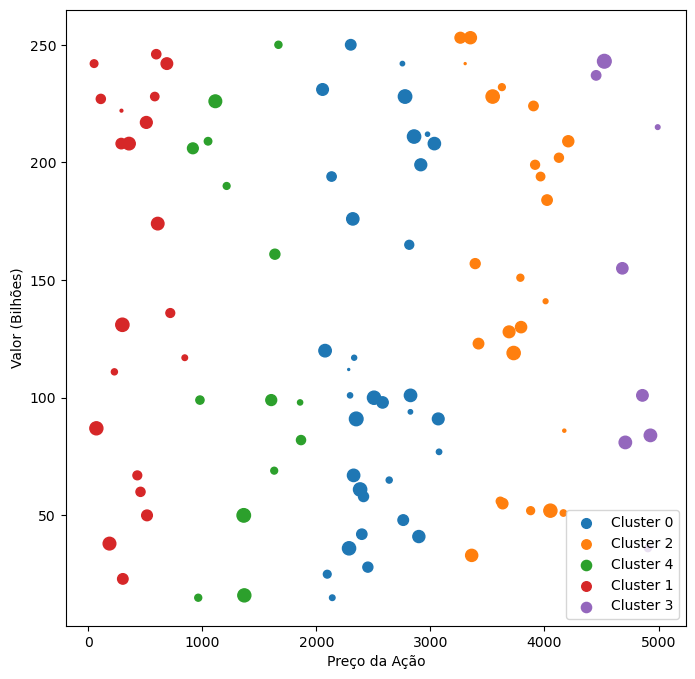

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           118.303030   54.515152                     2544.333333   
1           151.700000   52.600000                      408.000000   
2           150.160000   48.840000                     3757.920000   
3           144.000000   58.875000                     4757.250000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.181818   
1               0.050000           0.300000          0.300000   
2               0.040000           0.160000          0.240000   
3               0.125000           0.000000          0.125000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [ ]:
# Cluster = 5 - GRÁFICO 2D

data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['preço ação R$'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

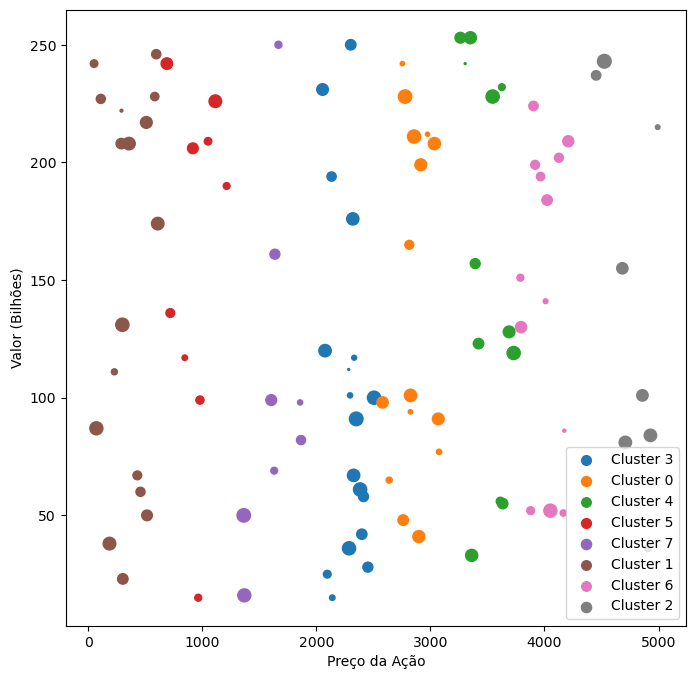

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           138.666667   52.533333                     2853.866667   
1           149.352941   54.529412                      347.235294   
2           144.000000   58.875000                     4757.250000   
3           101.333333   56.166667                     2286.388889   
4           156.583333   57.250000                     3494.666667   
5           160.000000   42.333333                      944.444444   
6           144.230769   41.076923                     4000.923077   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.266667           0.066667          0.200000   
1               0.058824           0.235294          0.352941   
2               0.125000           0.00

In [ ]:
# Cluster = 8 - GRÁFICO 2D

data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['preço ação R$'], cluster_data['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

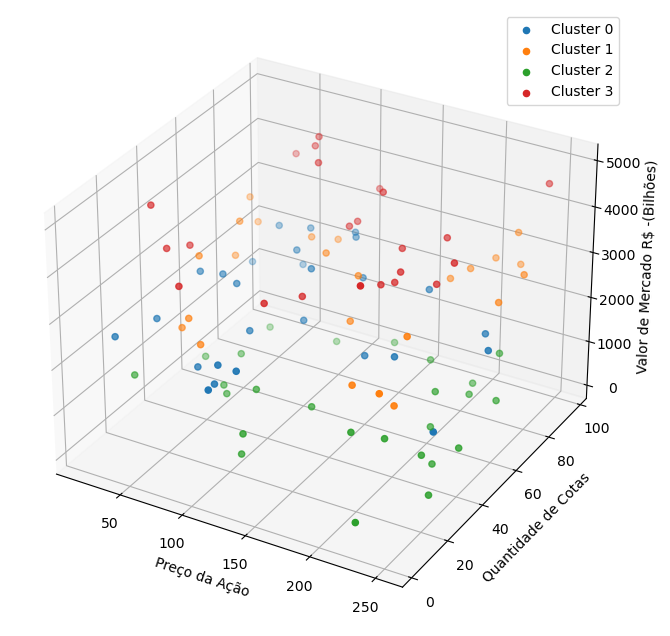

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           101.740741   54.777778                     2101.259259   
1           150.583333   52.000000                     3114.291667   
2           153.038462   50.307692                      553.961538   
3           142.347826   50.695652                     4238.695652   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.185185           0.074074          0.185185   
1               0.208333           0.083333          0.208333   
2               0.038462           0.230769          0.384615   
3               0.043478           0.130435          0.217391   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.111111         0.148148         0.148148  
1    

In [ ]:
# Cluster = 4 - GRÁFICO 3D

# Realizar o agrupamento com K-Means
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

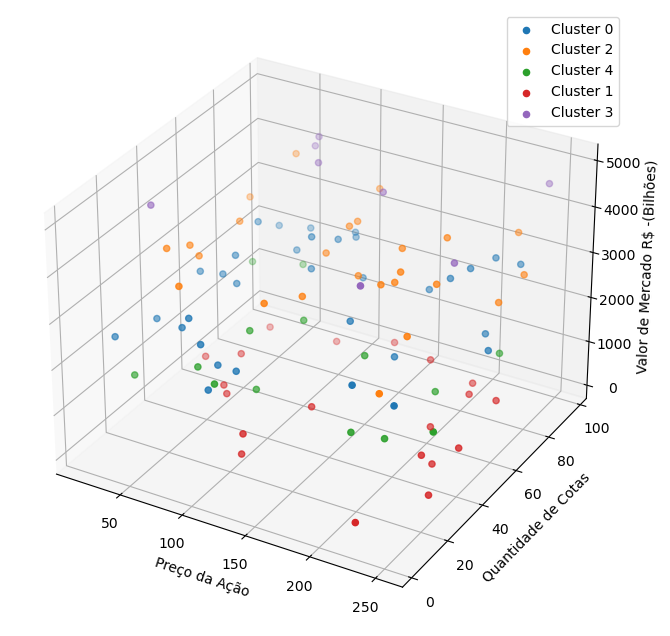

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           118.303030   54.515152                     2544.333333   
1           151.700000   52.600000                      408.000000   
2           150.160000   48.840000                     3757.920000   
3           144.000000   58.875000                     4757.250000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.181818   
1               0.050000           0.300000          0.300000   
2               0.040000           0.160000          0.240000   
3               0.125000           0.000000          0.125000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [ ]:
# Cluster = 5 - GRÁFICO 3D

# Realizar o agrupamento com K-Means
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

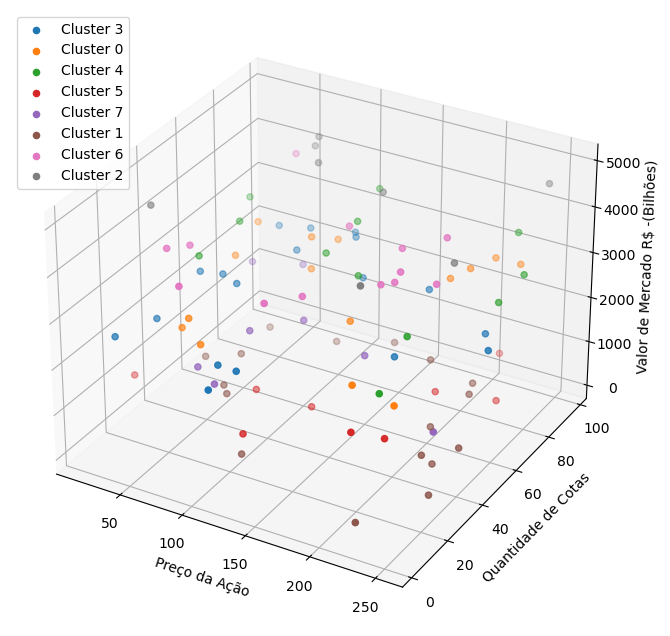

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           138.666667   52.533333                     2853.866667   
1           149.352941   54.529412                      347.235294   
2           144.000000   58.875000                     4757.250000   
3           101.333333   56.166667                     2286.388889   
4           156.583333   57.250000                     3494.666667   
5           160.000000   42.333333                      944.444444   
6           144.230769   41.076923                     4000.923077   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.266667           0.066667          0.200000   
1               0.058824           0.235294          0.352941   
2               0.125000           0.00

In [ ]:
# Cluster = 8 - GRÁFICO 3D

# Realizar o agrupamento com K-Means
data = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
features = data[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

A vantagem está na capacidade de explorar dados não rotulados, possibilitando a descoberta de informações e padrões sem a necessidade de conhecimento prévio ou anotações, o que pode ser crucial em conjuntos de dados extremamente grandes e complexos.